## Observations and Insights 

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem 
from scipy.stats import linregress 

In [3]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata_path

'data/Mouse_metadata.csv'

In [4]:
# Study data files
study_results_path = "data/Study_results.csv"
study_results_path

'data/Study_results.csv'

In [5]:
# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [6]:
study_results_df = pd.read_csv(study_results_path)
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# get list by Mouse Id and get the list length to counf mouseid 
mouse_id_count =len(study_results_df["Mouse ID"].unique()) # when print it I get list 
mouse_id_count
# check the number of mice

249

In [8]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 

In [9]:
# check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.
# i am thinking when time points being duplicated, adn wi wanna see what is being duplicated first 

dupl_mouse_df =study_results_df[study_results_df.duplicated(["Mouse ID","Timepoint"], keep=False)]
dupl_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [10]:

dupl_mouse_df_clean = dupl_mouse_df.drop_duplicates("Timepoint",keep = "first")
dupl_mouse_df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
329,g989,5,48.786801,0
620,g989,10,51.745156,0
815,g989,15,51.325852,1
950,g989,20,55.326122,1


In [11]:

cleaned_study_results_df = study_results_df.loc[study_results_df["Mouse ID"] != "g989"]
cleaned_study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [12]:
mouse_id_count_nondupl =len(cleaned_study_results_df["Mouse ID"].unique()) # when print it I get list 
mouse_id_count_nondupl 
# Recheck the number of mice

248

In [13]:
# Combine the data into a single dataset
# start from here 

cleaned_combined_df = pd.merge(cleaned_study_results_df, mouse_metadata_df, how = "outer", on = "Mouse ID")
cleaned_combined_df

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.000000,0.0,Capomulin,Female,9,22
1,b128,5.0,45.651331,0.0,Capomulin,Female,9,22
2,b128,10.0,43.270852,0.0,Capomulin,Female,9,22
3,b128,15.0,43.784893,0.0,Capomulin,Female,9,22
4,b128,20.0,42.731552,0.0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1876,m601,30.0,31.758275,1.0,Capomulin,Male,22,17
1877,m601,35.0,30.834357,1.0,Capomulin,Male,22,17
1878,m601,40.0,31.378045,1.0,Capomulin,Male,22,17
1879,m601,45.0,28.430964,1.0,Capomulin,Male,22,17


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
mean = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean 

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#grouped_clean_combined_df_fill = grouped_clean_combined_df.fillna(0)
#grouped_clean_combined_df_fill

In [16]:
# mean, median, variance,standard deviation, and SEM of the tumor volume for each regimen
median = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# mean, median, variance,standard deviation, and SEM of the tumor volume for each regimen
variance = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
std_div = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_div

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
sem_err = cleaned_combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_err

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [20]:
summ_stat_df = cleaned_combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median","var","std","sem"]})
summ_stat_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [21]:
## Bar and Pie Charts

In [22]:
grouped_df_to_extract= cleaned_combined_df[["Drug Regimen", "Mouse ID"]].groupby("Drug Regimen")
grouped_df_to_extract

In [23]:
num_mice_df = pd.DataFrame(grouped_df_to_extract["Mouse ID"].count())
num_mice_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,149
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


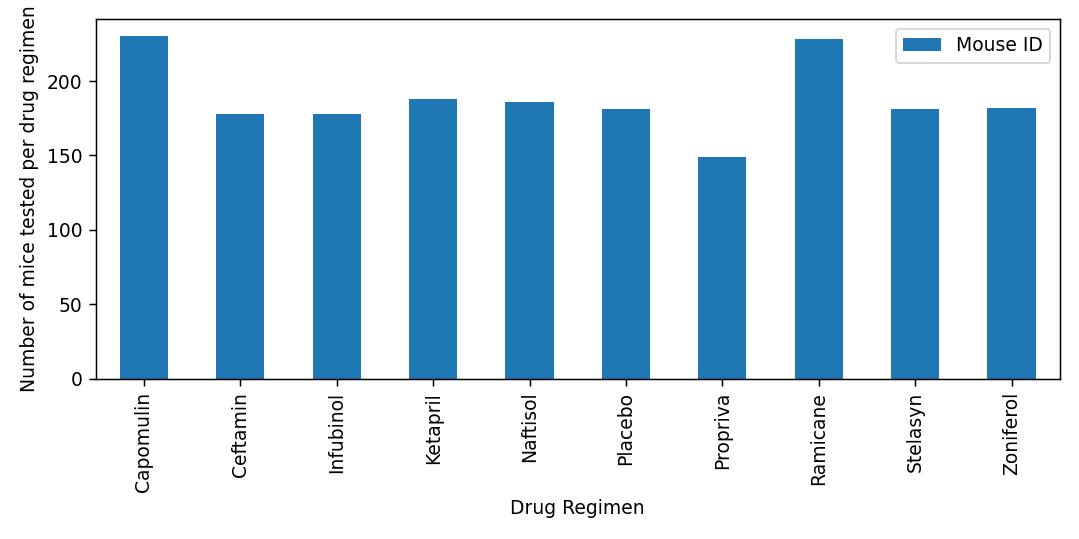

In [24]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
num_mice_df.plot(kind="bar", figsize=(8,4))

#Set a title for the chart
plt.ylabel("Number of mice tested per drug regimen")

#Display chart
plt.show()
plt.tight_layout() # nicely

In [25]:
drug_reg = num_mice_df.index.tolist()

In [26]:
drug_reg

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [27]:
mouse_count = num_mice_df["Mouse ID"].tolist()
mouse_count

[230, 178, 178, 188, 186, 181, 149, 228, 181, 182]

In [28]:
x_axis = np.arange(len(mouse_count))

In [55]:
tick_loc = [value for value in x_axis]

<IPython.core.display.Javascript object>


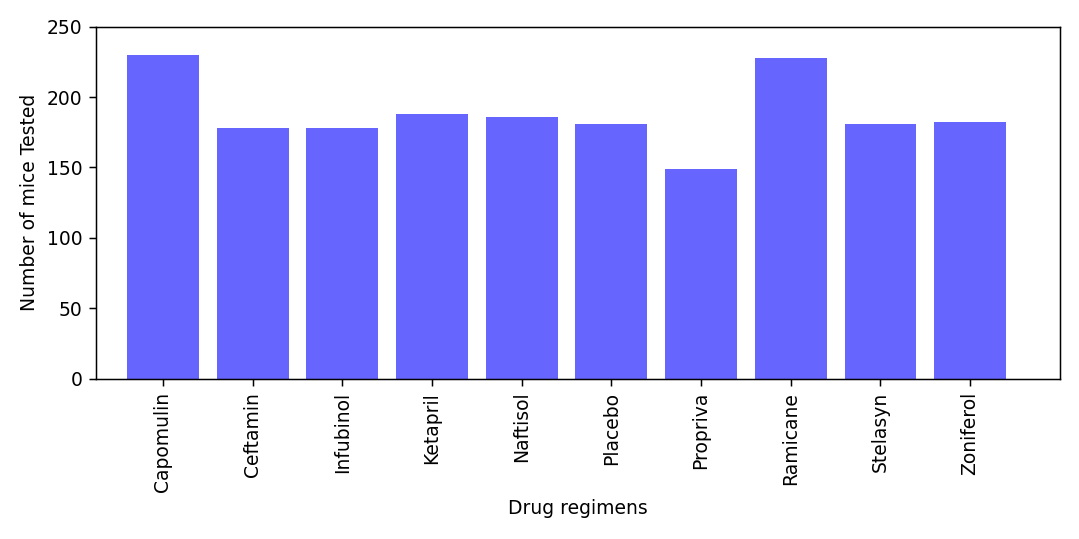

In [56]:
plt.figure(figsize=(8,4))
plt.bar(x_axis, mouse_count, color="blue", alpha=0.6, align="center")
plt.xticks(tick_loc, drug_reg, rotation="vertical")
plt.show()

plt.xlabel("Drug regimens")
plt.ylabel("Number of mice Tested")
plt.xlim(-0.75, 10)
plt.ylim(0, 250)
plt.tight_layout()
plt.show()

In [73]:
gender_group = cleaned_combined_df[["Mouse ID","Sex"]].groupby("Sex")
gender_group

In [74]:
gender_group_count = gender_group["Mouse ID"].count()
gender_group_count

Sex
Female    923
Male      958
Name: Mouse ID, dtype: int64

<IPython.core.display.Javascript object>


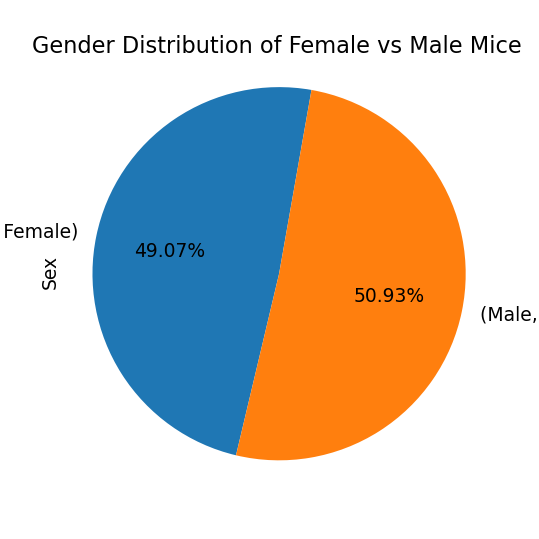

Sex     Sex   
Female  Female    923
Male    Male      958
Name: Sex, dtype: int64

In [102]:
# by panda 
fig2, ax2 = plt.subplots(figsize=(4, 4))
gender_df = gender_group["Sex"].value_counts()
gender_df.plot(kind = "pie",autopct='%1.2f%%',
            title = "", fontsize = 10, startangle=80)
plt.title("Gender Distribution of Female vs Male Mice")
plt.axis("equal")
plt.show()
gender_df

<IPython.core.display.Javascript object>


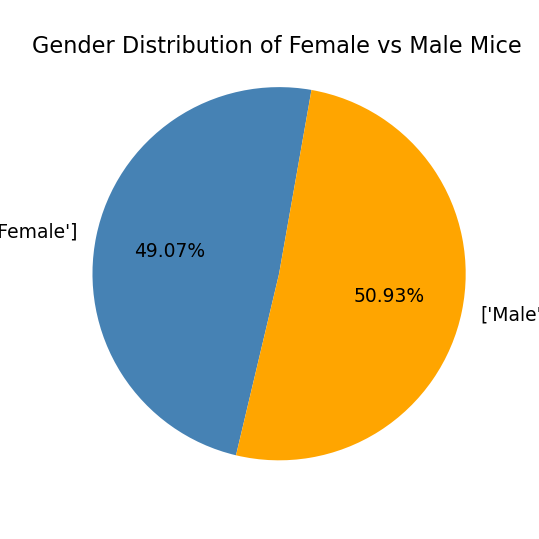

In [105]:
#by pyplot
fig3, ax3 = plt.subplots(figsize =(4,4))
labels = gender_group["Sex"].unique()
plt.pie(gender_df,autopct='%1.2f%%', labels=labels,colors = ("steelblue","orange"),textprops={'fontsize': 10}, startangle=80)
plt.title("Gender Distribution of Female vs Male Mice")
plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [38]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights